## DSCI552 HW0

Yiqi Xiong   
<br>
USC ID: 6202253435 &nbsp;&nbsp;Email: yiqixion@usc.edu

Import packages

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
```

## Pandas

(a) Consider the Salaries.csv file.
<br>
(b) Use the read_csv(...) method from Pandas (Documentation Link) to read data
from file Salaries.csv and to copy it into a dataframe.
<br>
(c) Make the column playerID in the csv file as the index column and the first row
as the header. Also, skip the second row when reading the file.

In [176]:
import pandas as pd
#pd.read_csv('Salaries.csv',index_col='playerID',header=0)
df = pd.read_csv("Salaries.csv", skiprows=[2], index_col="playerID")
df

,yearID,teamID,lgID,salary
playerID,,,,
barkele01,1985,ATL,NL,870000
benedbr01,1985,ATL,NL,545000
campri01,1985,ATL,NL,633333
ceronri01,1985,ATL,NL,625000
chambch01,1985,ATL,NL,800000
...,...,...,...,...
treinbl01,2015,WAS,NL,512800
ugglada01,2015,WAS,NL,507500
werthja01,2015,WAS,NL,21000000


<br>
(d) Select the ID of the players who are registered in ATL and HOU whose salary is
higher than one million.


In [35]:
higher_1million = df[((df.teamID=='ATL') | (df.teamID=='HOU')) & (df.salary>=1000000)]
print ('Number of players who are registered in ATL and HOU having salary higher than 1 million : ', higher_1million.shape[0])
print (higher_1million)

Number of players who are registered in ATL and HOU having salary higher than 1 million :  625
           yearID teamID lgID   salary
playerID                              
hornebo01    1985    ATL   NL  1500000
murphda05    1985    ATL   NL  1625000
suttebr01    1985    ATL   NL  1354167
ryanno01     1985    HOU   NL  1350000
hornebo01    1986    ATL   NL  1800000
...           ...    ...  ...      ...
rasmuco01    2015    HOU   AL  8000000
singljo02    2015    HOU   AL  2000000
sippto01     2015    HOU   AL  2400000
thatcjo01    2015    HOU   AL  1000000
valbulu01    2015    HOU   AL  4200000

[625 rows x 4 columns]


<br>
(e) Use the describe() method to calculate the standard deviation, first quartile, median, third quartile, mean, maximum, and minimum of the salary in team ATL.

In [47]:
data_ATL = df[(df.teamID=='ATL')]
data_ATL_std = data_ATL.std(axis=0)
print('Standard Deviation of team ATL salary is : ', round(data_ATL_std.salary, 4))
data_ATL_mean = data_ATL.mean(axis=0)
print('Mean of team ATL salary is : ', round(data_ATL_mean.salary,4))
data_ATL_max = data_ATL.max(axis=0)
print('Max of team ATL salary is : ', round(data_ATL_max.salary, 4))
data_ATL_quartile = data_ATL.quantile([0.25, 0.75, 0.5])
print('First and Third Quartiles, medium of team ATL salary is : ', round(data_ATL_quartile.salary,4))
data_ATL.describe()

Standard Deviation of team ATL salary is :  3434161.714
Mean of team ATL salary is :  2208110.7729
Max of team ATL salary is :  16061802
First and Third Quartiles, medium of team ATL salary is :  0.25     300000.0
0.75    2400000.0
0.50     600000.0
Name: salary, dtype: float64


,yearID,salary
count,885.000000,8.850000e+02
mean,1999.725424,2.208111e+06
std,8.766470,3.434162e+06
min,1985.000000,6.000000e+04
25%,1992.000000,3.000000e+05
50%,1999.000000,6.000000e+05
75%,2007.000000,2.400000e+06
max,2015.000000,1.606180e+07


<br>
(f) Create a Python dictionary object whose keys are the headers of the dataframe
created in the read_csv() exercise and values are Python list objects that contain
data corresponding to the headers. (Here, use the iterrows() method to iterate
each row of the dataframe and copy it to a dictionary. However, there is an easier
way. Learn how the to_dict() method works by yourself later)

In [52]:
dic = df.to_dict(orient='records')
#print(dic)

<br>
(g) Create a dataframe using pd.DataFrameRead (Documentation Link) and from
the dictionary created in (e). Then, change the header to "a", "b", "c", ... .


In [55]:
data = pd.DataFrame(dic)
data.columns = ['a', 'b', 'c', 'd']
data

,a,b,c,d
0,1985,ATL,NL,870000
1,1985,ATL,NL,545000
2,1985,ATL,NL,633333
3,1985,ATL,NL,625000
4,1985,ATL,NL,800000
...,...,...,...,...
25569,2015,WAS,NL,512800
25570,2015,WAS,NL,507500
25571,2015,WAS,NL,21000000
25572,2015,WAS,NL,16500000


## Seaborn

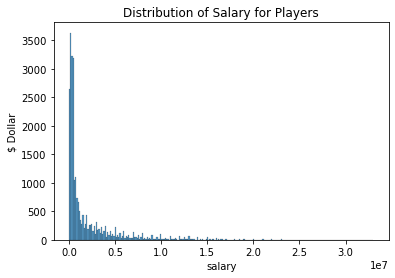

In [186]:
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('Salaries.csv',index_col='playerID')
df = pd.DataFrame(data)
df_copy = df
#cols_with_team_ATL = df_copy.loc[df_copy.teamID=="ATL", ]

#cols_with_team_ATL.plot.scatter(x = 'salary', y = 'yearID', title="Scatterplot between yearID and salary")
sns.histplot(df_copy.salary)
plt.title("Distribution of Salary for Players", fontsize = 12)
plt.ylabel("$ Dollar")
plt.show()

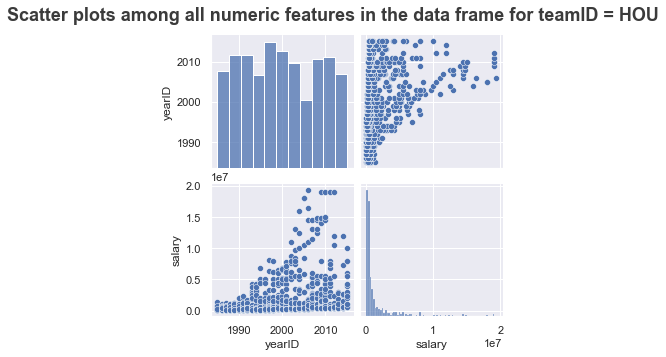

In [218]:
cols_with_team_HOU = df_copy.loc[df_copy.teamID=="HOU", ]
pairplot_fig = sns.pairplot(cols_with_team_HOU, vars=['yearID', 'salary'])

plt.subplots_adjust(top=0.9)
pairplot_fig.fig.suptitle("Scatter plots among all numeric features in the data frame for teamID = HOU", fontsize=18, alpha=0.9, weight='bold')
plt.show()

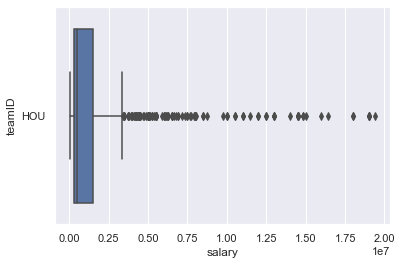

In [221]:
box_plot = sns.boxplot(y ='teamID', x='salary', data = cols_with_team_HOU, orient="h")

The distribution of salary for player at team HOU is skewed to the left and with many outliers that are higher than mean salary of this team though 1985 to 2015.

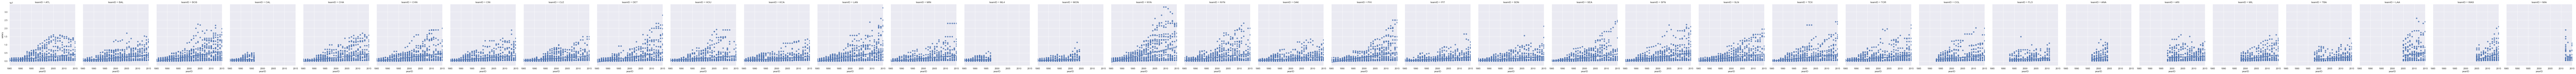

In [197]:
sns.lmplot(x="yearID", y="salary", col="teamID", data=df_copy)

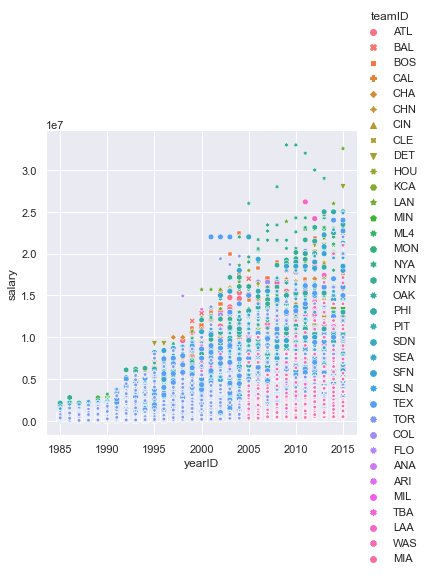

In [198]:
sns.relplot(x="yearID", y="salary",
            hue="teamID", style="teamID",
            data=df_copy);

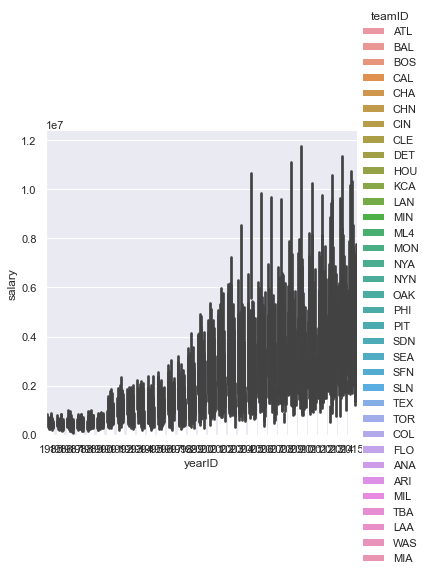

In [201]:
sns.catplot(x="yearID", y="salary", hue="teamID",
            kind="bar", data=df_copy)

## Numpy

(a) Create a 2-dimensional Python list object, then convert it to a Numpy array
object.


In [88]:
import numpy as np
l = [[1,2,3],[4,5,6]]
arr = np.array(l)
arr

array([[1, 2, 3],
       [4, 5, 6]])

<br>
(b) Examine the ndim, shape, size, dtype, itemsize, and data attributes of the numpy
array object. Make sure you understand their functions.

In [89]:
print("The dim of this array is", arr.ndim)
print("The shape of this array is", arr.shape)
print("The data type object of this array is", arr.dtype)
#returns the size (in bytes) of each element of a NumPy array.
print("The element size of this data-type object is", arr.itemsize)
#For 18 of the 21 types this number is fixed by the data-type. For the flexible data-types, this number can be anything.
#returns the size (in bytes) of each element of a NumPy array.

The dim of this array is 2
The shape of this array is (2, 3)
The data type object of this array is int32
The element size of this data-type object is 4


<br>
(c) Learn the dimension concept of an ndarray object by using reshape() and flatten()
methods

In [92]:
print("Flatten this array:", arr.flatten())
print("Reshape this array to ", np.reshape(arr,(3,2)))

Flatten this array: [1 2 3 4 5 6]
Reshape this array to  [[1 2]
 [3 4]
 [5 6]]


<br>
(d) Understand how the slice operation works for 1-D arrays and 2-D arrays and
practice by yourself.

In [100]:
a1 = np.array([[1,2],[2,1],[3,4],[4,3]])
a1[1:,0:1]

array([[2],
       [3],
       [4]])

<br>
(e) Learn operations on ndarray by examining the argmin(), argmax(), min(), max(),
mean(), sum(), std(), dot(), square(), sqrt(), abs(). exp(), sign(), and mod()
methods. Make yourself comfortable with these methods.

In [146]:
a2 = np.array([[1,2],[2,0]])
print(np.argmin(a2)) #index position
print(np.argmax(a2))
print("The min is", np.min(a2))
print("The max is", np.max(a2))
print("The mean is", round(np.mean(a2),4))
print("The sum is", np.sum(a2))
print("The standard deviation is", round(np.std(a2),4))
print("The dot product is", np.dot(a2,a2))
print("The squared array is", np.square(a2))
print("The squared root array is", np.sqrt(a2))
print("The absolute value is", np.abs(a2))
print("The exponential is", np.exp(a2))
print("The sign is", np.sign(a2))
a3 = np.array([[1,2],[2,1]])
print("The output of a2 mod a3 is", np.mod(a2,a3))

3
1
The min is 0
The max is 2
The mean is 1.25
The sum is 5
The standard deviation is 0.8292
The dot product is [[5 2]
 [2 4]]
The squared array is [[1 4]
 [4 0]]
The squared root array is [[1.         1.41421356]
 [1.41421356 0.        ]]
The absolute value is [[1 2]
 [2 0]]
The exponential is [[2.71828183 7.3890561 ]
 [7.3890561  1.        ]]
The sign is [[1 1]
 [1 0]]
The output of a2 mod a3 is [[0 0]
 [0 0]]


<br>
(f) Examine the arange(), ones(), zeros(), eye(), linspace(), and concatenate() methods. Make yourself comfortable with these methods.

In [174]:
#a4 = np.array([1,2],[3,4])
print("arangr", np.arange(4,9))
print("ones", np.ones((2,2)))
print("zeros", np.zeros((3,3)))
print("eye", np.eye(3)) #Return a 2-D array with ones on the diagonal and zeros elsewhere
print("linspace", np.linspace(1,10,num=3))
array_1 = np.linspace(1,10, num=2)
print("array_1", array_1)
array_2 = np.ones(1)
print("array_2", array_2)
print("concatenate array_1 and array_2", np.concatenate((array_1, array_2)))

arangr [4 5 6 7 8]
ones [[1. 1.]
 [1. 1.]]
zeros [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
eye [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
linspace [ 1.   5.5 10. ]
array_1 [ 1. 10.]
array_2 [1.]
concatenate array_1 and array_2 [ 1. 10.  1.]


## Matplotlib

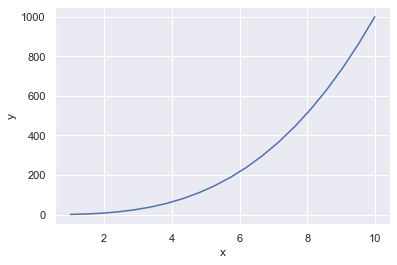

In [279]:
import matplotlib.pyplot as plt

x = np.linspace(1,10,num = 20)
y = np.array([i**3 for i in x])
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

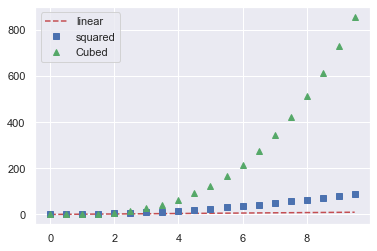

In [232]:
x = np.arange(0., 10., 0.5)

plt.plot(x, x, 'r--', x, x**2, 'bs', x, x**3, 'g^')
plt.legend(["linear", "squared", "Cubed"], loc ="upper left")
plt.show()

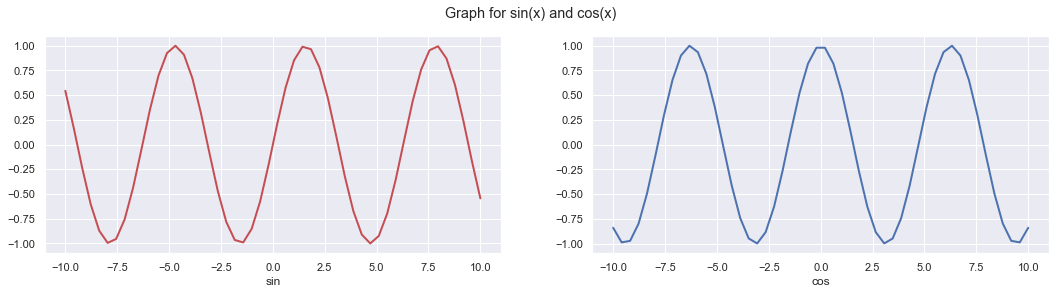

Text(0, 0.5, 'cos')

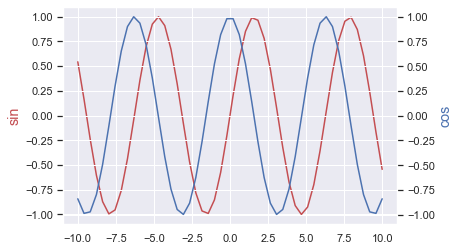

In [288]:
x = np.linspace(-10., 10.0)

y1 = np.sin(x) 
y2 = np.cos(x)


plt.figure(figsize=(18,4))
plt.subplot(1, 2, 1)
plt.plot(x, y1, color = "r", linewidth=2.0)
plt.xlabel('sin')

plt.subplot(1, 2, 2)
plt.plot(x, y2,linewidth=2.0)
plt.xlabel('cos')
plt.suptitle('Graph for sin(x) and cos(x)')
plt.show()

fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twinx()
ax1.plot(x, y1, "r-")
ax2.plot(x, y2, "b-")
ax1.set_ylabel("sin", color="r", fontsize="large" )
ax2.set_ylabel("cos", color="b", fontsize= "large")


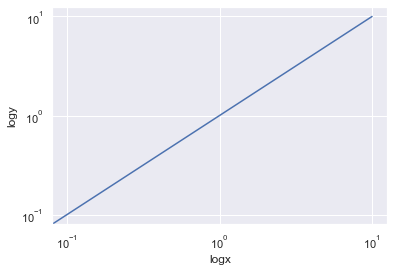

In [283]:
x = np.linspace(-10, 10, num=100)
y = np.array([j for j in x])

fig, ax = plt.subplots()

ax.plot(x, y)

ax.set_xscale("log")
ax.set_yscale("log")

plt.xlabel("log_x")
plt.ylabel("log_y")

plt.show()